In [423]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, roc_curve
data= pd.read_csv(r'C:\Users\Rawan\Desktop\HR.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [244]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [523]:
data.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

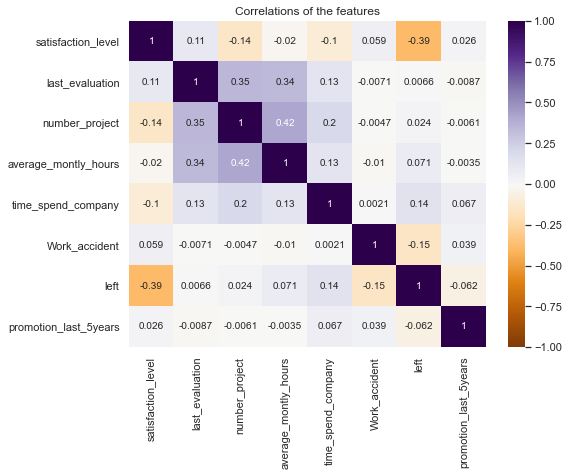

In [436]:
plt.figure(figsize=[8,6])

sns.heatmap(data.corr(), cmap="PuOr", annot=True, vmin=-1, vmax=1)

plt.title('Correlations of the features')
plt.show()

In [569]:
lef_emp= data[data['left']==1].shape[0]
contracted= data[data['left']==0].shape[0]
print('The total number of employees who have left the orgnization:', lef_emp)
print(' ')
print('The total number of contracted employees:', contracted)

The total number of employees who have left the orgnization: 3571
 
The total number of contracted employees: 11428


C:\Users\Rawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


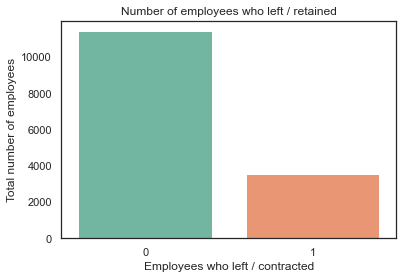

In [570]:
plt.figure(figsize=[6,4])
sns.countplot(data['left'], palette='Set2')
plt.title('Number of employees who left / retained')
plt.ylabel('Total number of employees')
plt.xlabel('Employees who left / contracted')
plt.show()

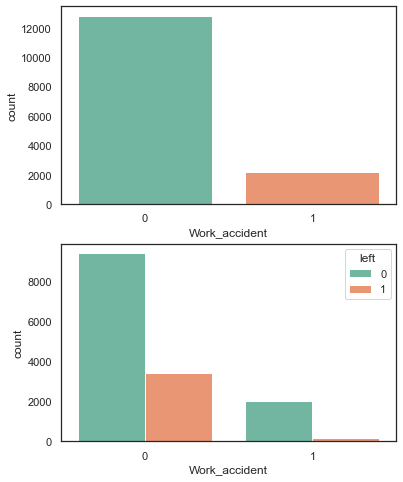

In [504]:
fig,axis= plt.subplots(2,1, figsize=(6,8))
sns.countplot(x='Work_accident',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='Work_accident', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

Even though the employees have had a workplace accident, the employees stay in the organization. So this feature does not have a direct and clear impact on employees leaving

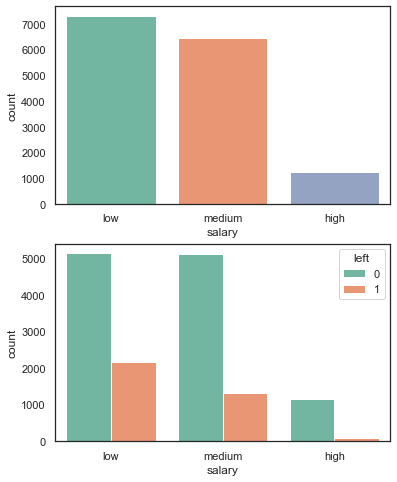

In [525]:
fig,axis= plt.subplots(2,1, figsize=(6,8))
sns.countplot(x='salary',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='salary', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

The left employees were receiving a low and medium level of salary

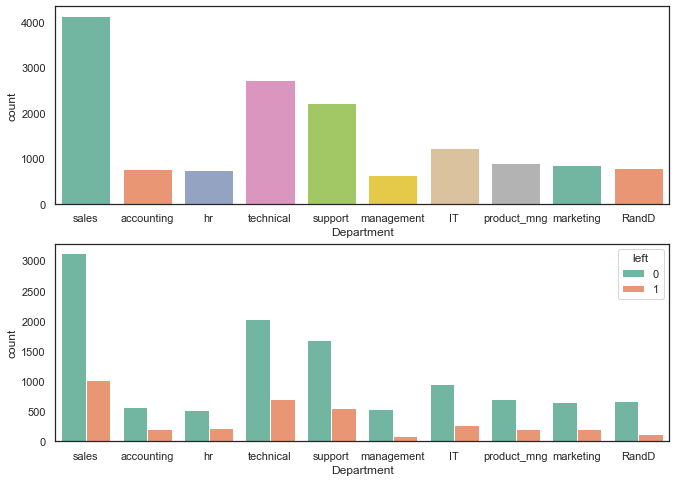

In [509]:
fig,axis= plt.subplots(2,1, figsize=(11,8))
sns.countplot(x='Department',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='Department', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

The sales department contains the largest number of employees, and the management department contains the least number of employees.

It seems that the department feature does not have a direct impact on employee leaving, the number of employees who are left depends on the total number of employees in the department, the higher the total number of employees in a department, the more employee left.
So, since the sales department contains the largest number of employees, it contains the highest number of employees who are left

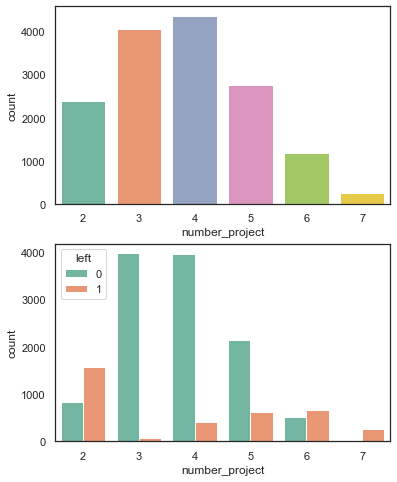

In [511]:
fig,axis= plt.subplots(2,1, figsize=(6,8))
sns.countplot(x='number_project',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='number_project', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

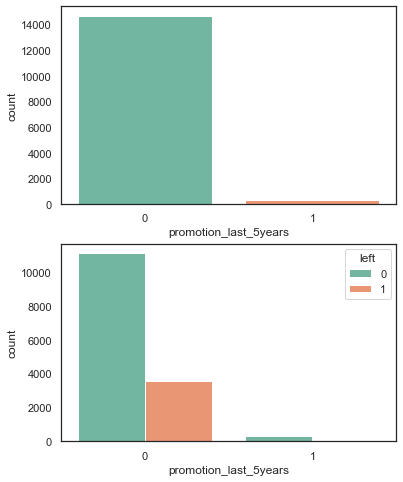

In [514]:
fig,axis= plt.subplots(2,1, figsize=(6,8))
sns.countplot(x='promotion_last_5years',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='promotion_last_5years', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

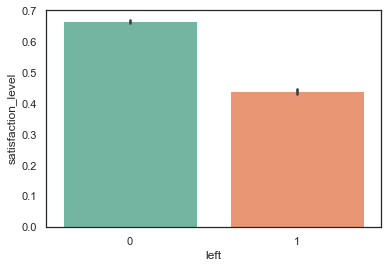

In [516]:
plt.figure(figsize=[6,4])
sns.barplot(x='left', y ='satisfaction_level' ,data=data, palette='Set2')
plt.show()

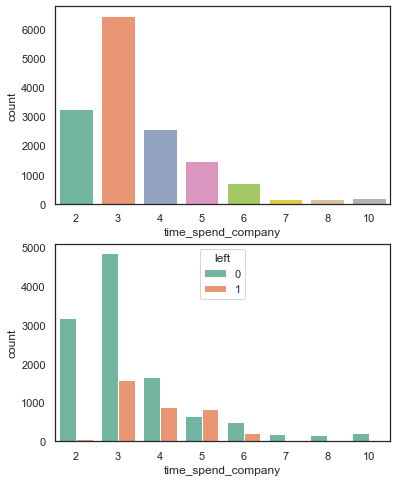

In [517]:
fig,axis= plt.subplots(2,1, figsize=(6,8))
sns.countplot(x='time_spend_company',data=data , ax=axis[0],palette='Set2')
sns.countplot(x='time_spend_company', hue = 'left' , data=data , ax=axis[1],palette='Set2')
plt.show()

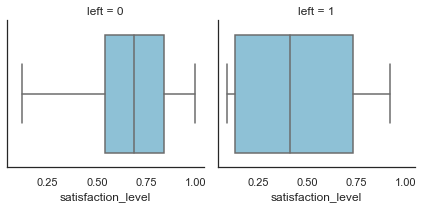

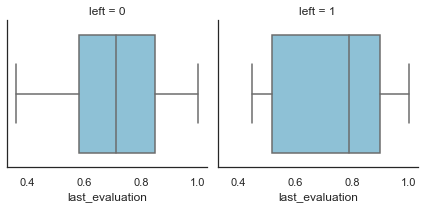

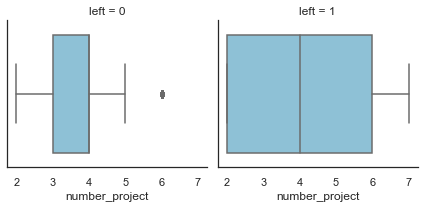

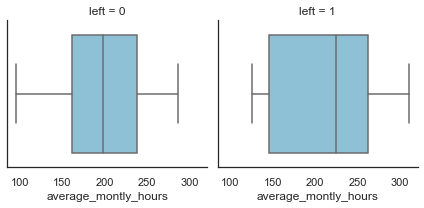

In [568]:
sns.set_color_codes('muted')

satisfaction_level= sns.FacetGrid(data, col='left')
satisfaction_level.map(sns.boxplot, 'satisfaction_level',color='c',  order=['0', '1'])

last_evaluation= sns.FacetGrid(data, col='left')
last_evaluation.map(sns.boxplot, 'last_evaluation',color='c',  order=['0', '1'])

number_project= sns.FacetGrid(data, col='left')
number_project.map(sns.boxplot, 'number_project',color='c',  order=['0', '1'])

average_montly_hours= sns.FacetGrid(data, col='left')
average_montly_hours.map(sns.boxplot, 'average_montly_hours',color='c', order=['0', '1'])

The employees who handle a large amount of projects and have a lower satisfaction rate tend to leave the organization.

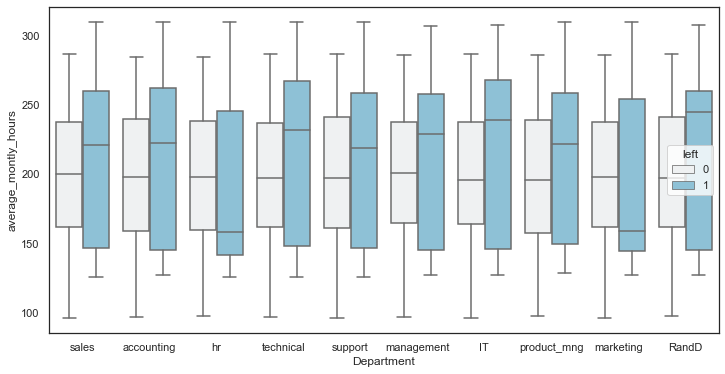

In [561]:
plt.figure(figsize=[12,6])
sns.set_color_codes('muted')
sns.boxplot(y='average_montly_hours', x='Department', hue= 'left',color='c', data=data)
plt.show()

The employees who have left the organization were working for longer hours; there is a direct impact between long work hours and employees leaving.

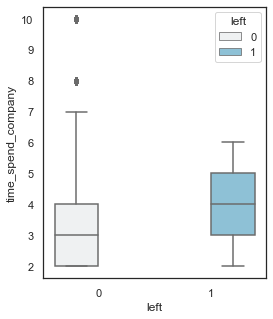

In [567]:
plt.figure(figsize=[4,5])
sns.set_color_codes('muted')
sns.boxplot(y='time_spend_company', x='left', hue= 'left',color='c', data=data)
plt.show()

The employees with high time employed by the organization tends to leave the organization. 

In [306]:
#Convert the Categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['salary'] = labelEncoder_X.fit_transform(data['Department'])
data['Department'] = labelEncoder_X.fit_transform(data['Department'])

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,7
1,0.80,0.86,5,262,6,0,1,0,7,7
2,0.11,0.88,7,272,4,0,1,0,7,7
3,0.72,0.87,5,223,5,0,1,0,7,7
4,0.37,0.52,2,159,3,0,1,0,7,7


Logistic Regression model

In [308]:
x = data.drop('left', axis = 1)
y = data['left']

In [298]:
#split dataset into train set and test set
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.20, random_state=42)

In [528]:
LR= LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [320]:
y_predicted = LR.predict(x_test)

In [303]:
#Evaluation of the model
LR.score(x_test,y_test)

0.758

In [416]:
print(confusion_matrix(y_test,y_predicted))

[[2114  180]
 [ 546  160]]


In [325]:
print(accuracy_score(y_test,y_predicted))

0.758


In [329]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



In [422]:
mean_squared_error(y_test,y_predicted)

0.242

KNN model

In [383]:
kn= KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [384]:
y_predicted1 = kn.predict(x_test)

In [386]:
kn.score(x_test,y_test)

0.9273333333333333

In [389]:
print(confusion_matrix(y_test,y_predicted1))

[[2148  146]
 [  72  634]]


In [390]:
print(accuracy_score(y_test,y_predicted1))

0.9273333333333333


In [420]:
print(classification_report(y_test,y_predicted1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2294
           1       0.81      0.90      0.85       706

    accuracy                           0.93      3000
   macro avg       0.89      0.92      0.90      3000
weighted avg       0.93      0.93      0.93      3000



In [421]:
mean_squared_error(y_test,y_predicted1)

0.07266666666666667

KNN model is more accurate than the Logistic Regression model with 92.73% accuracy.